In [1]:
from LIMxCMBL.init import *

inner_dkparp_integral = np.load('/oak/stanford/orgs/kipac/users/delon/LIMxCMBL/inner_dkparp_integral.npy')

In [2]:
inner_dkparp_integral.shape

(100, 256, 128)

In [3]:
ells.shape

(100,)

In [4]:
chibs.shape

(256,)

In [5]:
deltas.shape

(128,)

In [6]:
import matplotlib.pyplot as plt
from matplotlib import colors


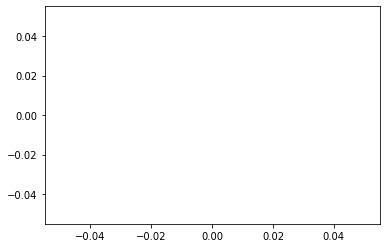

In [7]:
plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": "10",
    "font.family" : "serif",
    'figure.constrained_layout.use':True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'hatch.linewidth':0.1
})

In [8]:
def srch(val):
    return np.argmin(np.abs(ells-val)), ells[np.argmin(np.abs(ells-val))]

In [9]:
print(srch(10))
print(srch(100))
print(srch(500))
print(srch(1000))
print(srch(5000))

(0, 10.0)
(37, 102.024849126919)
(62, 490.0766864923265)
(73, 977.5739027526402)
(99, 4999.999999999999)


In [10]:
ell_idxs = [0, 37, 62, 73, 99]
titles = [10, 100, 500, 1000, 5000]

In [11]:
chibs_Gpc = chibs/1000

In [12]:
plt_left = plt.rcParams['figure.subplot.left']
plt_right = plt.rcParams['figure.subplot.right']
plt_cntr = (plt_left + plt_right) / 2


/tmp/ipykernel_81701/3258351898.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0.0)


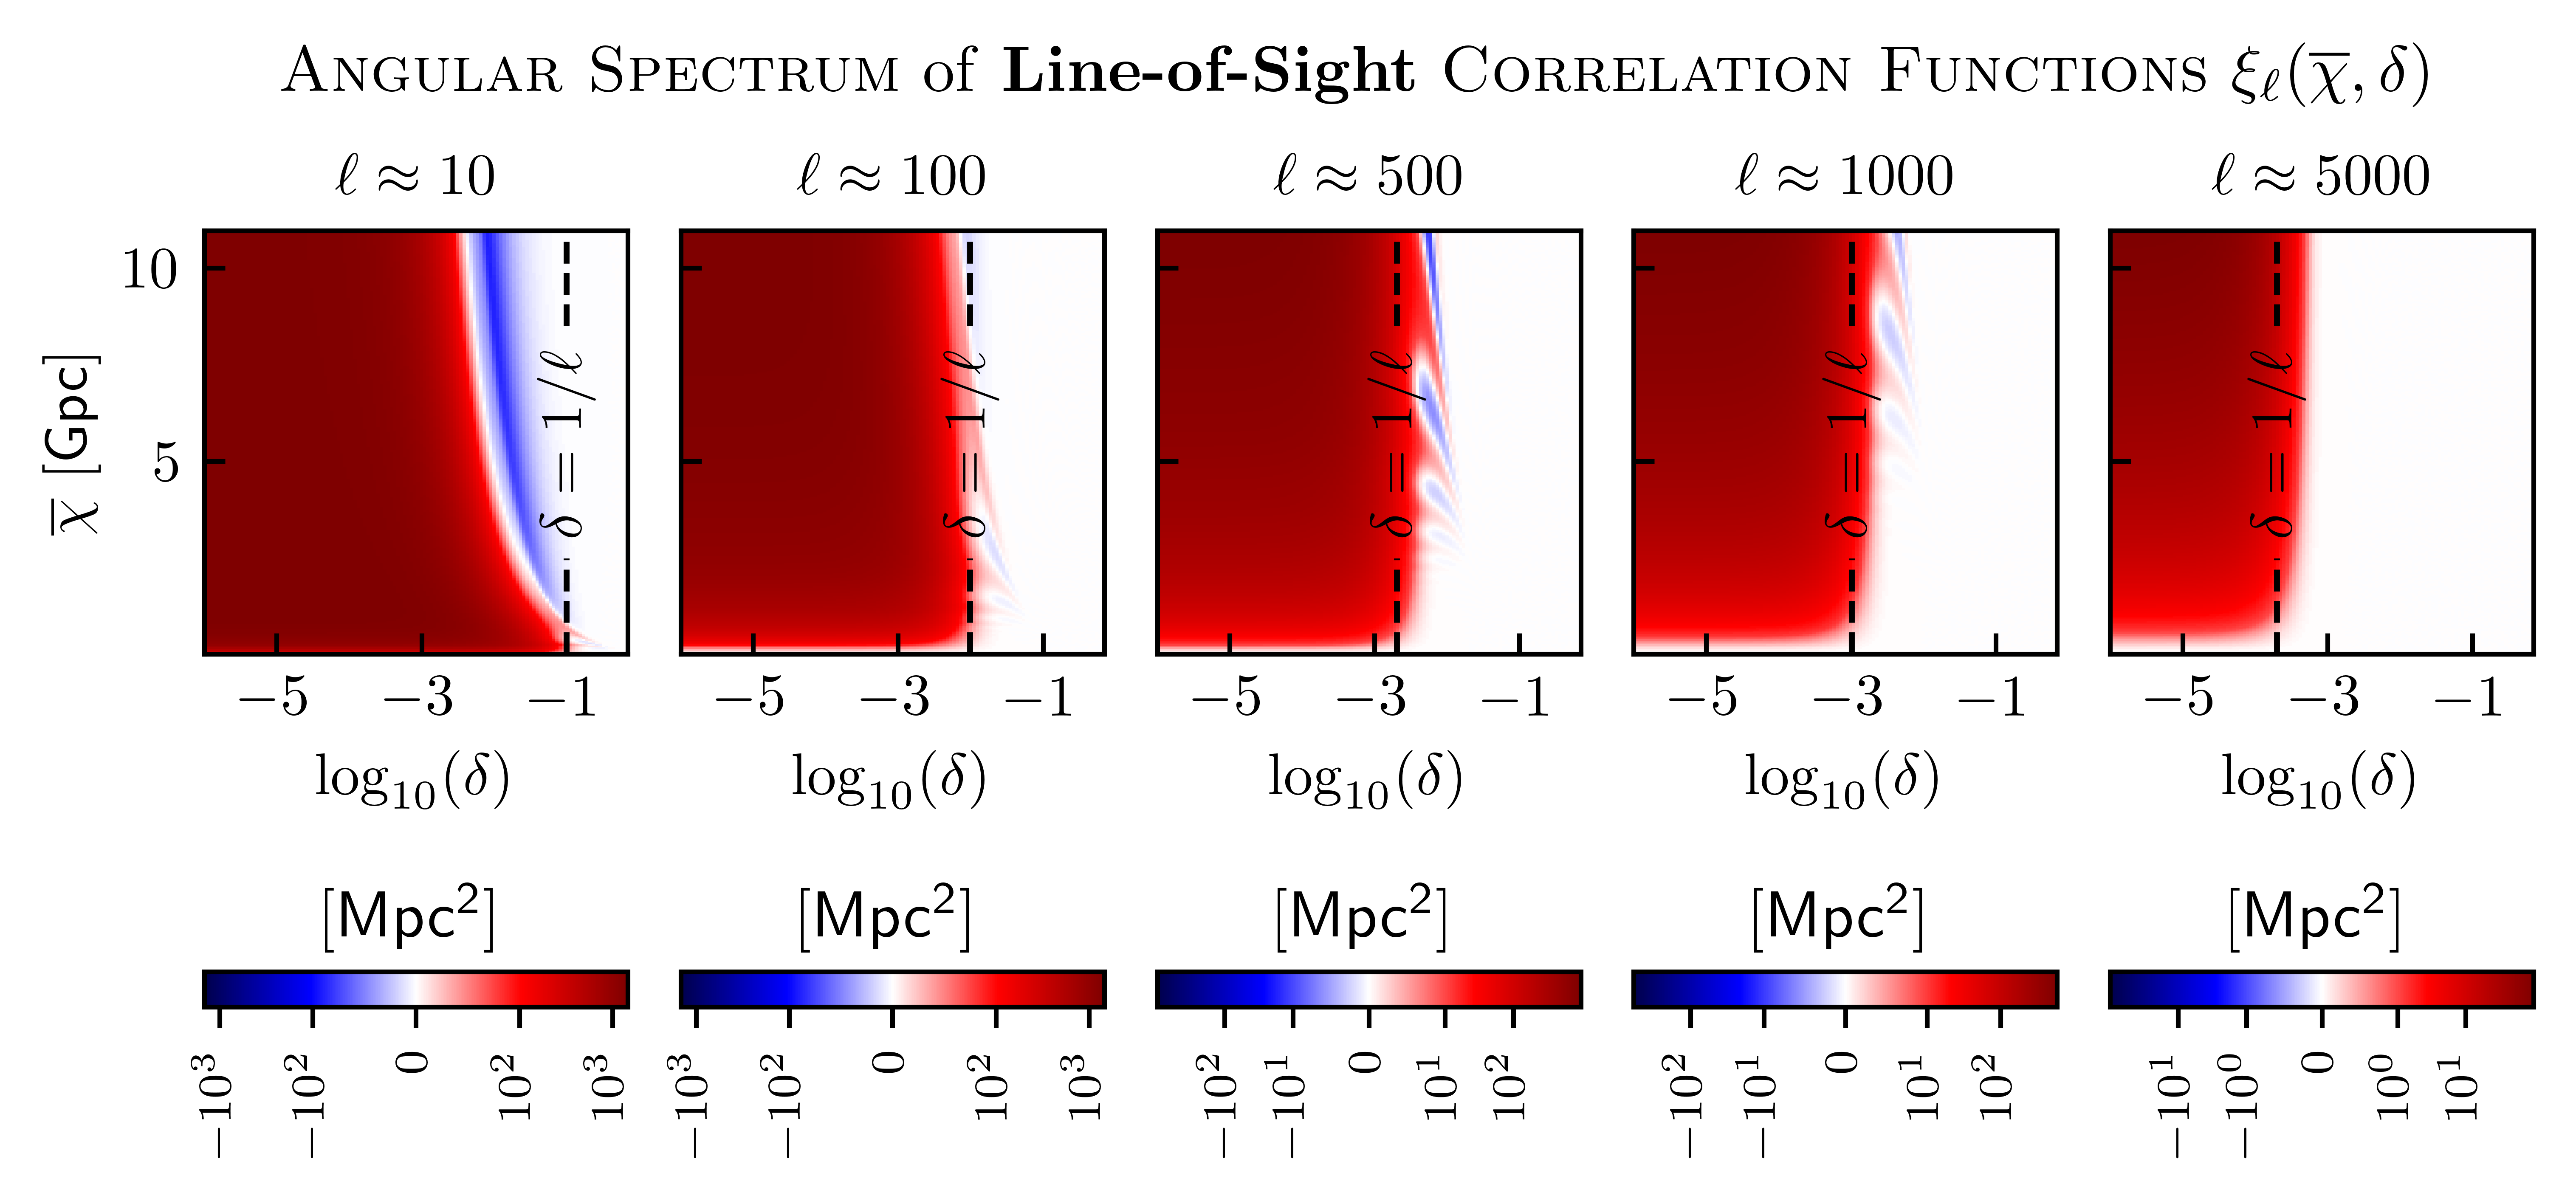

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=5, 
                             figsize = (5.8, 3.65/3), facecolor = 'w', dpi = 1000,
                            sharex = 'col',
                            sharey = 'row')
plt.tight_layout(pad = 0.0)

for i,ell_idx in enumerate(ell_idxs):
    ax = axs[i]
    vb = np.max(np.abs(inner_dkparp_integral[ell_idx]))
    
    log10vb = np.log10(vb)
    linthresh = 10**(np.floor(log10vb)-1)
    vminmax = 10**(log10vb)

    norm = colors.SymLogNorm(linthresh=linthresh, 
                                 linscale=1,
                                 vmin=-vminmax, 
                                 vmax=vminmax, 
                                 base=10)
    im = ax.imshow(np.float64(inner_dkparp_integral[ell_idx]), 
              origin='lower',
              cmap = 'seismic',
              norm = norm,
              aspect =  (max(np.log10(deltas)) - min(np.log10(deltas))) / (max(chibs_Gpc) - min(chibs_Gpc)),
              extent=[min(np.log10(deltas)), max(np.log10(deltas)),
                      min(chibs_Gpc), max(chibs_Gpc),])
    ax.set_xlabel(r'$\log_{10}(\delta)$')
    ax.set_title(r'$\ell \approx %d$'%(titles[i]), fontsize=10)
    ax.set_xticks([-5,-3,-1])
    
    label = ax.text(x = np.log10(1/ells[ell_idx]), y = np.mean(chibs_Gpc),
            s = r'$\delta = 1 / \ell$', rotation = 90,
            horizontalalignment = 'center', verticalalignment='center'
           )
    
    ax.get_figure().canvas.draw()
    bbox = label.get_window_extent().transformed(ax.transAxes.inverted())
    bbox.y0 -= 0.05
    bbox.y1 += 0.05
    bbox = bbox.transformed(ax.transAxes).transformed(ax.transData.inverted())
    left, right = ax.get_ylim()
    ax.vlines([np.log10(1/ells[ell_idx]),]*2, 
              [left, bbox.y1], [bbox.y0, right], 
              color='k', linestyle='--', lw=1)

 



    _bbox = ax.get_position()
    dy = _bbox.ymax - _bbox.ymin
    dx = _bbox.xmax - _bbox.xmin
    cbar_ax = fig.add_axes([_bbox.xmin, 
                            _bbox.ymin - 5/6*dy, 
                            dx, 
                            1/12*dy])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax,
                       orientation='horizontal', )#label=r'\sf[kJy/sr]')
    cbar.ax.tick_params(labelsize=8, rotation = 90, direction='out')
    cbar.ax.set_title(r"$\sf[Mpc^2]$", fontsize = 11)
    cbar.set_ticks(ticks = [-(10**(np.floor(log10vb))), -linthresh,0,linthresh, 10**(np.floor(log10vb))])
    

axs[0].set_ylabel(r'$\overline\chi$ [{\sf Gpc}]')


fig.text(plt_cntr, 1.2, r"\textsc{Angular Spectrum} of \textbf{Line-of-Sight} \textsc{Correlation Functions} $\xi_\ell(\overline\chi,\delta)$",
         ha='center', 
         va='bottom', 
        fontsize=11)


plt.savefig('figures/013.001.pdf', bbox_inches='tight')


In [ ]:
vb = np.max(np.abs(inner_dkparp_integral[0]))

In [ ]:
ell_idxs = [0, 37, 62, 73]
titles = [10, 100, 500, 1000, 5000]

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=1, 
                             figsize = (3.5, 5), facecolor = 'w', dpi = 1000,
                            sharex = 'col',
                            sharey = 'row')
plt.tight_layout(pad = 0.0)

for i,ell_idx in enumerate(ell_idxs):
    ax = axs[i]
#     vb = np.max(np.abs(inner_dkparp_integral[ell_idx]))
    
    log10vb = np.log10(vb)
    linthresh = 10**(np.floor(log10vb)-2)
    vminmax = 10**(log10vb)

    norm = colors.SymLogNorm(linthresh=linthresh, 
                                 linscale=1,
                                 vmin=-vminmax, 
                                 vmax=vminmax, 
                                 base=10)
    im = ax.imshow(np.float64(inner_dkparp_integral[ell_idx]), 
              origin='lower',
              cmap = 'seismic',
              norm = norm,
              aspect =  (max(np.log10(deltas)) - min(np.log10(deltas))) / (max(chibs_Gpc) - min(chibs_Gpc)) / 1.618,
              extent=[min(np.log10(deltas)), max(np.log10(deltas)),
                      min(chibs_Gpc), max(chibs_Gpc),])
    ax.text(x = 0.05,
            y = 0.95,
            s = r'$\ell \approx %d$'%(titles[i]), 
            horizontalalignment = 'left',
            verticalalignment='top',
            transform = ax.transAxes,
            color='white',
            fontsize=10)
    ax.set_xticks([-5,-3,-1])
    ax.set_ylabel(r'$\overline\chi$ [{\sf Gpc}]')
    ax.tick_params(axis='y', direction='out')
    _bbox = ax.get_position()
    dy = _bbox.ymax - _bbox.ymin
    dx = _bbox.xmax - _bbox.xmin  


axs[-1].set_xlabel(r'$\log_{10}(\delta)$')

fig.text(plt_cntr, axs[0].get_position().ymax * 1.01, 
         r"Line-of-sight Correlations",
         ha='center', 
         va='bottom', 
        fontsize=11)

_bbox = axs[-1].get_position()
dy = _bbox.ymax - _bbox.ymin
dx = _bbox.xmax - _bbox.xmin  

cbar_ax = fig.add_axes([_bbox.xmin, 
                        _bbox.ymin - 3*dy/6, 
                        dx, 
                        dy / 12])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax,
                   orientation='horizontal',
                    label=r"$\xi_\ell(\overline\chi, \delta)$ $\sf[Mpc^2]$"
                   )
cbar.ax.tick_params(labelsize=9, rotation = 90, direction='out')

# cbar.set_ticks(ticks = [-(10**(np.floor(log10vb))), -linthresh,0,linthresh, 10**(np.floor(log10vb))])

plt.savefig('figures/013.001.pdf', bbox_inches='tight')
